In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd 
from sklearn.datasets import load_breast_cancer


In [3]:

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [5]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

gb_scores = cross_val_score(gb, X_train, y_train, cv=5)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

gb.fit(X_train, y_train)

print("Gradient Boosting CV mean:", gb_scores.mean())
print("Random Forest CV mean:", rf_scores.mean())


Gradient Boosting CV mean: 0.9604395604395604
Random Forest CV mean: 0.9582417582417584


In [6]:
importances = gb.feature_importances_
features = X.columns

fi = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

fi


,feature,importance
20,worst radius,0.516994
22,worst perimeter,0.185106
27,worst concave points,0.084735
21,worst texture,0.055061
7,mean concave points,0.036467
26,worst concavity,0.030017
11,texture error,0.028601
23,worst area,0.017643
13,area error,0.010264
1,mean texture,0.006972


In [7]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    gb,
    X_train,
    y_train,
    n_repeats=10,
    random_state=42
)

pi = pd.DataFrame({
    "feature": X.columns,
    "importance": r.importances_mean
}).sort_values(by="importance", ascending=False)

pi


,feature,importance
21,worst texture,0.009451
26,worst concavity,0.003297
10,radius error,0.001978
13,area error,0.001538
7,mean concave points,0.000440
2,mean perimeter,0.000000
5,mean compactness,0.000000
4,mean smoothness,0.000000
3,mean area,0.000000
6,mean concavity,0.000000


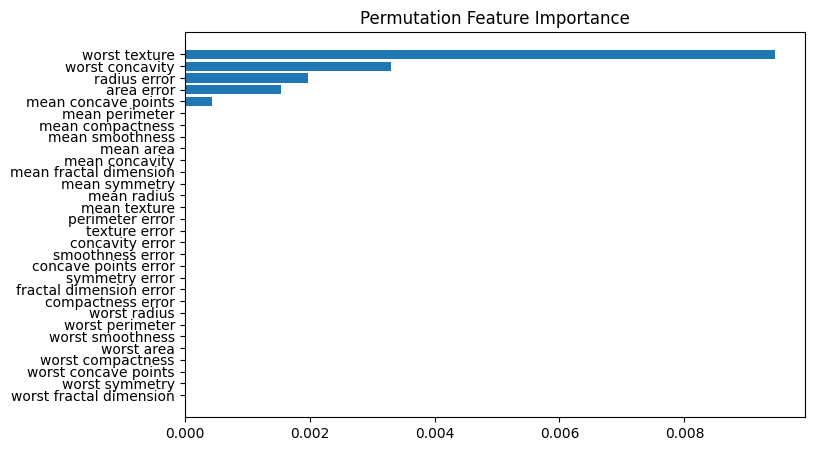

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(pi["feature"], pi["importance"])
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance")
plt.show()


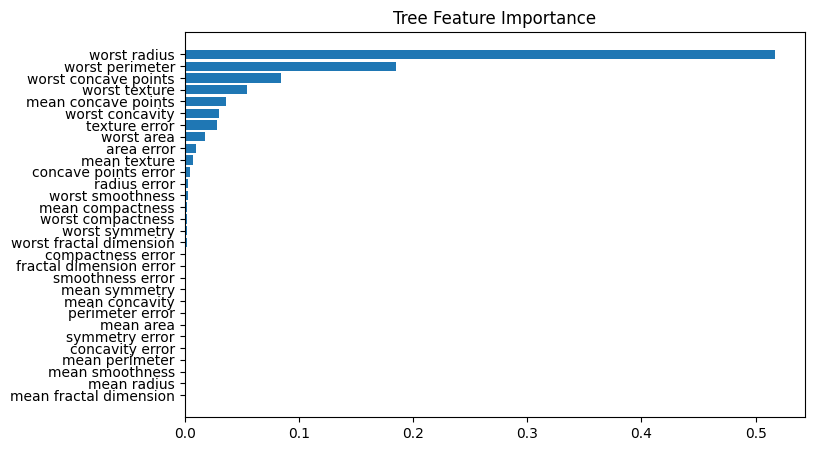

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(fi["feature"], fi["importance"])
plt.gca().invert_yaxis()
plt.title("Tree Feature Importance")
plt.show()


In [10]:
import shap

explainer = shap.Explainer(gb, X)
shap_values = explainer(X)


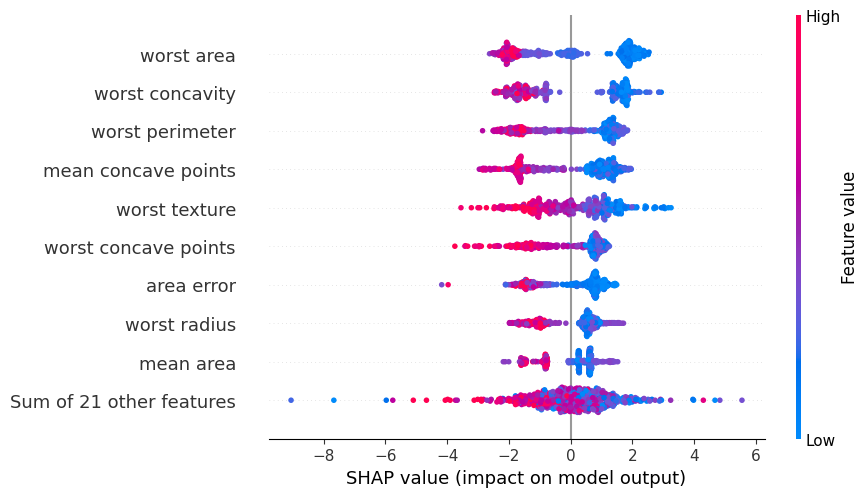

In [20]:
shap.plots.beeswarm(shap_values)
